## Importing the required packages ##

In [1]:
! pip install textract

  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0


ERROR: Cannot uninstall six 1.16.0, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps six==1.16.0'.


In [2]:
import pandas as pd
import pathlib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
import os 
import uuid
import textract
import glob

In [3]:
import pandas as pd
import pathlib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
import os 
import uuid
import textract
import glob

In [4]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [5]:
print(os.getcwd())

C:\Users\JU486WK\OneDrive - EY\Desktop\Topic Modelling_POC


In [6]:
source_directory = os.path.join(os.getcwd(), "InputFiles")

for filename in os.listdir(source_directory):
    file, extension = os.path.splitext(filename)
    unique_filename = str(uuid.uuid4()) + extension
    os.rename(os.path.join(source_directory,  filename), os.path.join(source_directory, unique_filename))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\JU486WK\\OneDrive - EY\\Desktop\\Topic Modelling_POC\\InputFiles'

In [ ]:
# Execute oly once after converted into text files else will generate multiple duplicate files
Newtextfiles_dir=os.path.join(os.getcwd(), "Newtextfiles")

for process_file in  os.listdir(source_directory):
    file, extension = os.path.splitext(process_file)
    
    # We create a new text file name by concatenating the .txt extension to file UUID
    dest_file_path = file + '.txt'
    
    #extract text from the file
    content = textract.process(os.path.join(source_directory, process_file))
    
    # We create and open the new and we prepare to write the Binary Data which is represented by the wb - Write Binary
    write_text_file = open(os.path.join(Newtextfiles_dir, dest_file_path), "wb")
    
    #write the content and close the newly created file
    write_text_file.write(content)
    write_text_file.close()

In [7]:
import docx2txt

## Reading the files ##

In [8]:
# Opening JSON file  and reading data
my_text = docx2txt. process('C:/Users/JU486WK/OneDrive - EY/Desktop/Topic Modelling_POC/dbd5bc22-276c-458d-975b-8aa8e3479e7c.docx','r') 
#returns JSON object as  
# a dictionary 
print(my_text)

0:0:0.0 --> 0:0:1.220
Sundaresan M R
Clarifying questions.

0:0:6.730 --> 0:0:7.530
Chanakya Sharma
I think we're going.

0:0:9.260 --> 0:0:9.790
Sanal K Nair
Yeah.

0:0:5.980 --> 0:0:9.990
Subish Ram
No, I think they're good. So you have a questionnaire or something, or you're gonna go.

0:0:9.590 --> 0:0:12.120
Tanya N Cardoso
Yes, yes, yes, so.

0:0:11.260 --> 0:0:12.240
Sundaresan M R
To partner with you.

0:0:13.180 --> 0:0:21.330
Tanya N Cardoso
Thank you Sunderland. Thanks Sobis Chanakyan channel for joining today. So that has set the context this.

0:0:22.530 --> 0:0:51.940
Tanya N Cardoso
Kind of a format will be run twice a year with our key stakeholders as nominated by the service functions to get a sense of a how we are doing SGD S what are the priorities and how we can partner so this entire conversation is structured around six questions, so 45 minutes for six questions at the end of the session. Do give us feedback on the number of questions and.

0:0:52.20 --> 0:1:15.70

In [9]:
# Convert string to Dataframe
data = my_text
df = pd.DataFrame([x.split(';') for x in data.split('\n')])
df.columns = ['Text']

In [10]:
df

,Text
0,0:0:0.0 --> 0:0:1.220
1,Sundaresan M R
2,Clarifying questions.
3,
4,0:0:6.730 --> 0:0:7.530
5,Chanakya Sharma
6,I think we're going.
7,
8,0:0:9.260 --> 0:0:9.790
9,Sanal K Nair


In [11]:
# Identify blank rows and drop
index_names = df[df['Text'] == ''].index
df.drop(index_names, inplace = True)

In [12]:
df[1:50]

,Text
1,Sundaresan M R
2,Clarifying questions.
4,0:0:6.730 --> 0:0:7.530
5,Chanakya Sharma
6,I think we're going.
8,0:0:9.260 --> 0:0:9.790
9,Sanal K Nair
10,Yeah.
12,0:0:5.980 --> 0:0:9.990
13,Subish Ram


In [13]:
# Drop rows with time stamp followed by names
m = df['Text'].astype(str).str.startswith('0')
df = df[~m & ~m.shift(fill_value=False)]
#df = df[~df['Text'].astype(str).str.startswith('[6')]
#df = df[~df['Text'].astype(str).str.startswith('[7')]
df = df[~df['Text'].astype(str).str.startswith('[18')]
df = df[~df['Text'].astype(str).str.startswith('[19')]
m = df['Text'].astype(str).str.startswith('1')
df = df[~m & ~m.shift(fill_value=False)]
#df= df["Text"].str.replace(r's*https?://S+(s+|$)','').str.strip()
df["Text"] = df["Text"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()

In [14]:
df.reset_index(inplace = True, drop = True)
df.head()

,Text
0,Clarifying questions.
1,I think we're going.
2,Yeah.
3,"No, I think they're good. So you have a questi..."
4,"Yes, yes, yes, so."


In [15]:
df[1:40]

,Text
1,I think we're going.
2,Yeah.
3,"No, I think they're good. So you have a questi..."
4,"Yes, yes, yes, so."
5,To partner with you.
6,Thank you Sunderland. Thanks Sobis Chanakyan c...
7,Kind of a format will be run twice a year with...
8,"How you see it playing out today, there are th..."
9,"Ohh, service functions. The first set of quest..."
10,"Is aligned to what we as a GDS R for you, what..."


In [16]:
df.reset_index(inplace = True, drop = True)
df.head()

,Text
0,Clarifying questions.
1,I think we're going.
2,Yeah.
3,"No, I think they're good. So you have a questi..."
4,"Yes, yes, yes, so."


In [17]:
len(df)

297

In [18]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
#new_stopwords =['also','alright,','alright','take','around','right','give','across','term','back','medium','ring','well','well,','well.','much','much,','few','fill','audience','best','guy','enters','coming','save','register','calender','session','shruti','grow','flow','thinking','best','lusong','laarni','floreshow','vincent','vic','shailendra','ajit','anoop ','prashanth','satish','marzena','praveen','ranbir','sree','john','John,','lusonghow','singh','pathania','ramjanam','biswas','sajit','phineas','prashanth','prashanth.','prashant','alright','cortana','subject','medium','medium','anoob,','anoop','Medium,','medium,','anoop,','maybe.','maybe','yeah','know','thank','one','really','part','team','like','actually','know','know,','see','see,','key','think','know.','thank','ranbir,','pravin',
               #"Hari,","Hari","hari","hari","Harry","Harry.","Harry,","harry","harry.","harry,","lional.","Lional Correya","Hariharan","hariharan","presentation","presentation.","presentation,","Lena.","right","right.","right,","right.","right?","Right.","Right?","Yeah,","Yeah.","Yeah, yeah, yeah.","yeah,","yeah.","Yeah.","Yeah, yeah.","Lional Correya","lional correya","Lional,Hari","Lional,","lional.","lional,"]
    #"sure.","sure","ensure","sure,",#"question","question.","questions.","questionnaire","questions,","questions", 
#new_stopwords = ["talking","talk","talked","talk.",'data','please','please,','please.','things','things,','things.','back','back.','back,','saw','saw,','saw.','much','much,','much.','thing.','thing,','possibility','possibility.','possibility,','possible','possible,','possible.','case','case,','matter','matter?','yes,','yes.','yes',"let'",'let','already','already.','nine,','people,','people','session','session.','session,','sessions','sessions,','yeah.','yeah,','lot','lots','lot.','lot,','still,','still','still.','use','actually', 'ajit', 'april', 'arun', 'august', 'based', 'basically', 'binoy', 'couple', 'daily', 'download', 'earlier', 'earlier,', 'earlier.', 'english', 'eric', 'erica', 'esp,elk', 'even', 'evening', 'first', 'first.', 'five', 'four', 'gangadharan', 'georgedo', 'giresh', 'going', 'hari', 'harris', 'harry', 'harry,', 'harry.', 'headset', 'himanshu', 'hololens', 'hundred', 'john', 'july', 'july.', 'karthik', 'karthikeyanis', 'kathyayani', 'kilometer', 'kilometers', 'know', 'know,', 'kumar', 'kumar!', 'landell', 'last', 'laugh', 'leanda', 'lee', 'let', 'like', 'manigandan', 'maybe', 'maybe.', 'minus', 'minute', 'month', 'morning', 'muraly', 'narayana', 'next', 'nine', 'one', 'one!', 'one,', 'one.', 'part', 'place', 'pradeep', 'rajan', 'really', 'right', 'right,', 'right.', 'right?', 'sarun', 'screen', 'second', 'see', 'session', 'seven', 'shani', 'shany', 'six', 'tag', 'team', 'thank', 'thing', 'thing,', 'thing.', 'think', 'think.', 'three', 'today', 'today.', 'tom', 'tonight', 'two', 'use,matter', 'user', 'using', 'venkat', 'venkat.', 'video', 'video,', 'video.', 'vini', 'vinu', 'want', 'wednesday', 'weekly', 'well', 'whatever', 'yeah', 'year', 'years', 'yes', 'zero']
new_stopwords =["would","breadth","able","saying,","say","roof?","roof,","Otherwise","Other","Others","otherwise","other","others",
"may","new","Nobody.","nobody.","roof?","roof,","take","end","several","Sundar","sundar","fine.","fine",
"ask","together","together.","Nobody. Nobody.","system","getting","sorry","suman.","cool","every",
"honey, I.","honey,","helps","Ohh","ohh","get","gets","Umm.","Umm,","umm","would","also","Also",
"Hmm.","hmm.","hmm","yep.","Yep.","yep","kind","key","nuances","way","end","end?","got","get","that's","That's",
"that","That,","that,","hear.","helped","input","job","hear","saying","say","maybe","Maybe","may",
"Hey,","hey,","wa","try","full","gauge",
    "something,","something","might","could","couldn't","pramoud","also","also.","also,","Also",
    "many","side.","sides.","side,","anchors",
                "point","point.","point,","points","mind","mindset","mind.","start","started","start.","free","feel","trying",
    "ahead.","ahead,","coming","lines.","lines,","line","always","pretty","long","across",
    "sure.","sure","ensure","sure,",
                "question","question.","questions.","questionnaire","questions,","questions", 
    "tanya,","tanya","tanya.","bring","bringing","brings","guess.","guess","said","said.","said","done?","done",
    "chanakyan","chanakya","chanakya,","chanakya.","subish","subish.","subish's","subish?",
    "comes.","comes","come","come.","Thanks","Thanks.","thanks","thanks.","need","chanakya","talking","talk","talked","talk.",'data','please','please,','please.','things','things,','things.','back','back.','back,','saw','saw,','saw.','much','much,','much.','thing.','thing,','possibility','possibility.','possibility,','possible','possible,','possible.','case','case,','matter','matter?','yes,','yes.','yes',"let'",'let','already','already.','nine,','people,','people','session','session.','session,','sessions','sessions,','yeah.','yeah,','lot','lots','lot.','lot,','still,','still','still.','use','actually', 'ajit', 'april', 'arun', 'august', 'based', 'basically', 'binoy', 'couple', 'daily', 'download', 'earlier', 'earlier,', 'earlier.', 'english', 'eric', 'erica', 'esp,elk', 'even', 'evening', 'first', 'first.', 'five', 'four', 'gangadharan', 'georgedo', 'giresh', 'going', 'hari', 'harris', 'harry', 'harry,', 'harry.', 'headset', 'himanshu', 'hololens', 'hundred', 'john', 'july', 'july.', 'karthik', 'karthikeyanis', 'kathyayani', 'kilometer', 'kilometers', 'know', 'know,', 'kumar', 'kumar!', 'landell', 'last', 'laugh', 'leanda', 'lee', 'let', 'like', 'manigandan', 'maybe', 'maybe.', 'minus', 'minute', 'month', 'morning', 'muraly', 'narayana', 'next', 'nine', 'one', 'one!', 'one,', 'one.', 'part', 'place', 'pradeep', 'rajan', 'really', 'right', 'right,', 'right.', 'right?', 'sarun', 'screen', 'second', 'see', 'session', 'seven', 'shani', 'shany', 'six', 'tag', 'team', 'thank', 'thing', 'thing,', 'thing.', 'think', 'think.', 'three', 'today', 'today.', 'tom', 'tonight', 'two', 'use,matter', 'user', 'using', 'venkat', 'venkat.', 'video', 'video,', 'video.', 'vini', 'vinu', 'want', 'wednesday', 'weekly', 'well', 'whatever', 'yeah', 'year', 'years', 'yes', 'zero']

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


## Text Cleaning ##

In [23]:
#### Cleaning Function
def text_cleaning(clean):
    ## Lower case the text and split it into a list of words
    step1=(re.sub('\d',' ', re.sub('\.',' ',clean.lower()[0:len(clean)]))).split()
   
    # this command line will remove stopwordsd
    #step2=filtered_words = [word for word in step1 if word not in stopwords.words('english')]
    step2=filtered_words = [word for word in step1 if word not in stpwrd]

    step3=" ".join(step2)

    #this will remove special characters from the text 
    step4=re.sub('[^a-zA-Z0-9]', ' ' ,step3).split()

    # this commamd will remove 10 letter words( we can change the word len 2,3,4,5 depends on the requirement in (if len(word)>2,3,4,5))
    step5 = [word for word in step4 if len(word)>=10]
    
    #step6 = re.sub(r'[^https?:\/.*[\r]*]', ' ',str(step5)).split()
    
    # lemmatization is used for vocabulary and morphological analysis of words
    abc = lemmatized_words = [wnl.lemmatize(token) for token in step5]
    final = " ".join(abc)
    final = final.replace('gd', 'gds')
    return final

    
def getCleanText(df):
    data = df.copy()
    data['Text'] = data['Text'].astype(str)
    data['cleanedText'] = data['Text'].apply(text_cleaning)
    return(data)

In [24]:
# Passing text to function and getting cleaned data
sample = pd.DataFrame(df['Text'])
cleandat = getCleanText(sample)

In [25]:
cleandat.head()

,Text,cleanedText
0,Clarifying questions.,clarifying
1,I think we're going.,
2,Yeah.,
3,"No, I think they're good. So you have a questi...",
4,"Yes, yes, yes, so.",


In [26]:
cleandat

,Text,cleanedText
0,Clarifying questions.,clarifying
1,I think we're going.,
2,Yeah.,
3,"No, I think they're good. So you have a questi...",
4,"Yes, yes, yes, so.",
5,To partner with you.,
6,Thank you Sunderland. Thanks Sobis Chanakyan c...,sunderland
7,Kind of a format will be run twice a year with...,stakeholder priority conversation structured
8,"How you see it playing out today, there are th...",participating
9,"Ohh, service functions. The first set of quest...",


In [27]:
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stpwrd)]
    return ' '.join(sent)

In [28]:
# Lemmatize the complaints
cleandat['lemma'] =  cleandat.cleanedText.apply(lambda x: lemmatizer(x))
cleandat.head()

,Text,cleanedText,lemma
0,Clarifying questions.,clarifying,clarify
1,I think we're going.,,
2,Yeah.,,
3,"No, I think they're good. So you have a questi...",,
4,"Yes, yes, yes, so.",,


In [29]:
# Identify blank rows and drop
index_names = cleandat[cleandat['lemma'] == ''].index
cleandat.drop(index_names, inplace = True)

In [30]:
cleandat
#cleandat['cleanedText']

,Text,cleanedText,lemma
0,Clarifying questions.,clarifying,clarify
6,Thank you Sunderland. Thanks Sobis Chanakyan c...,sunderland,sunderland
7,Kind of a format will be run twice a year with...,stakeholder priority conversation structured,stakeholder priority conversation structure
8,"How you see it playing out today, there are th...",participating,participate
13,"And feel free to answer, as Sundar mentioned, ...",perspective thankthanksto transcription possib...,perspective thankthanksto transcription
18,"Yeah, no, no. So basically, if you want to go ...",particularly,particularly
19,We do work as one team. There is a lot of coll...,collaboration collaborate,collaboration collaborate
20,"Ohh, you know solutioning mindset that we go w...",solutioning,solutioning
29,Intelligence and information all under one roo...,intelligence information structured,intelligence information structure
32,I I would recall what Subish and Sanal my coll...,colleague,colleague


## Building the wordcloud ##

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\ju486wk\\anaconda2\\envs\\py37_test\\lib\\site-packages\\six-1.16.0.dist-info\\METADATA'



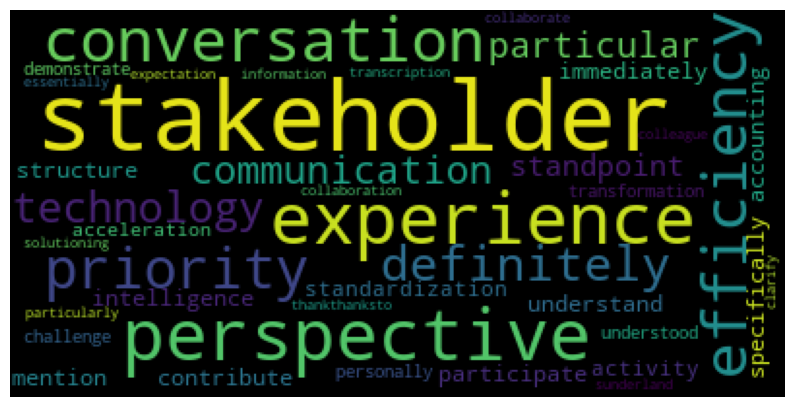

In [31]:
## Find the top 40 words by frequency among all the articles after processing the text.
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(max_words=40).generate(str(cleandat.lemma))

print(wordcloud)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [32]:
# Convert entire text to string
textstr = cleandat['lemma'].str.cat(sep=' ')
print(textstr)

clarify sunderland stakeholder priority conversation structure participate perspective thankthanksto transcription particularly collaboration collaborate solutioning intelligence information structure colleague understand contribute particular expectation perspective conversation essentially respond responding particular establish intelligence specifically organization stakeholder stakeholder opportunity definitely immediately mention technology efficiency offshore accounting technology efficiency standardization standardization activity ecosystem experience partnership acceleration transformation understood perspective combination excellence efficiency technology definitely centralized absolutely difference perspective technology mention acceleration transformation additional efficiency priority standpoint understand challenge automation efficiency definitely perspective efficiency communication importantly communication communication communicating tremendous stakeholder competency co

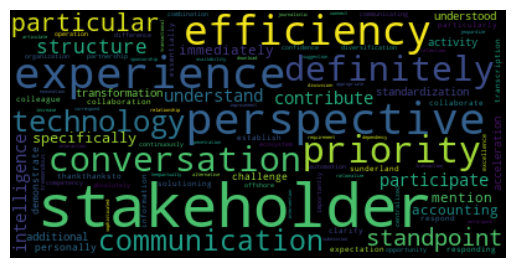

In [33]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(textstr)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save wordcloud image
wordcloud.to_file('wordcloud.png')

## Finding the unigram , bigram  an trigrams ##

In [34]:
## Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text
# Write your code here to find the top 30 unigram,bigram,trigram frequency 
# among the complaints in the cleaned datafram(df_clean).

def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [35]:
top_30_unigrams = get_top_n_bigram(cleandat.lemma,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(cleandat.lemma,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(cleandat.lemma,ngram=3, top=30)

In [36]:
#Print the top 10 words in the unigram frequency
print('Top 10 unigrams:\n')
top_30_unigrams[:10]

Top 10 unigrams:



[('stakeholder', 15),
 ('perspective', 7),
 ('experience', 7),
 ('efficiency', 6),
 ('priority', 5),
 ('conversation', 5),
 ('definitely', 5),
 ('technology', 4),
 ('communication', 4),
 ('particular', 3)]

In [37]:
#Print the top 10 words in the bigram frequency
print('Top 10 biigrams:\n')
top_30_bigrams[:10]

Top 10 biigrams:



[('acceleration transformation', 2),
 ('stakeholder priority', 1),
 ('priority conversation', 1),
 ('conversation structure', 1),
 ('perspective thankthanksto', 1),
 ('thankthanksto transcription', 1),
 ('collaboration collaborate', 1),
 ('intelligence information', 1),
 ('information structure', 1),
 ('understand contribute', 1)]

In [38]:
#Print the top 10 words in the trigram frequency
print('Top 10 trigrams:\n')
top_30_trigrams[:10]

Top 10 trigrams:



[('stakeholder priority conversation', 1),
 ('priority conversation structure', 1),
 ('perspective thankthanksto transcription', 1),
 ('intelligence information structure', 1),
 ('partnership acceleration transformation', 1),
 ('technology mention acceleration', 1),
 ('mention acceleration transformation', 1),
 ('acceleration transformation additional', 1),
 ('transformation additional efficiency', 1),
 ('additional efficiency priority', 1)]

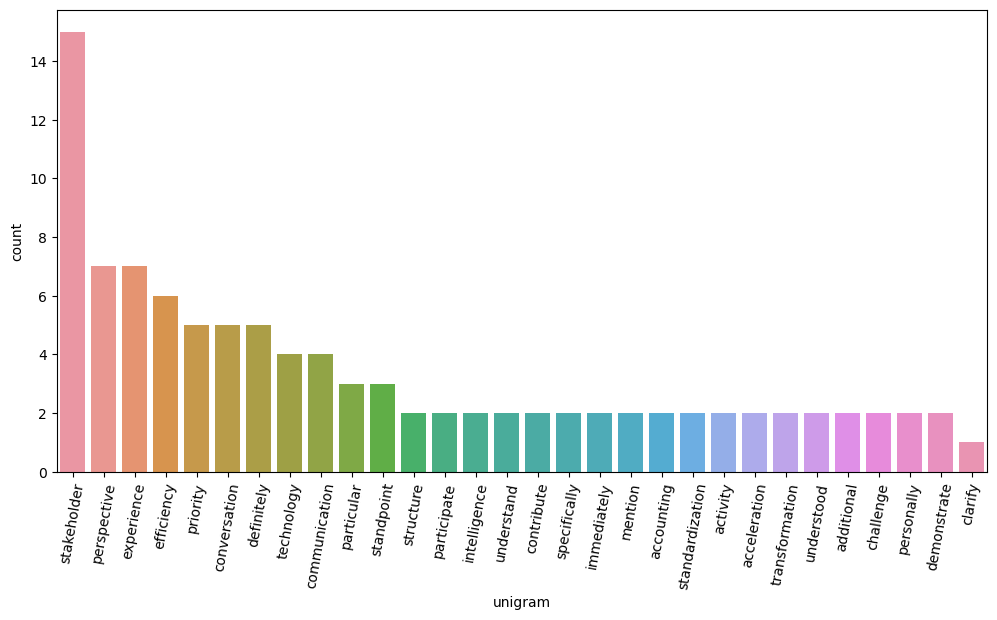

In [39]:
#Plot graph for the top 30 words in the unigram frequency
df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.xticks(rotation = 80)
plt.show()

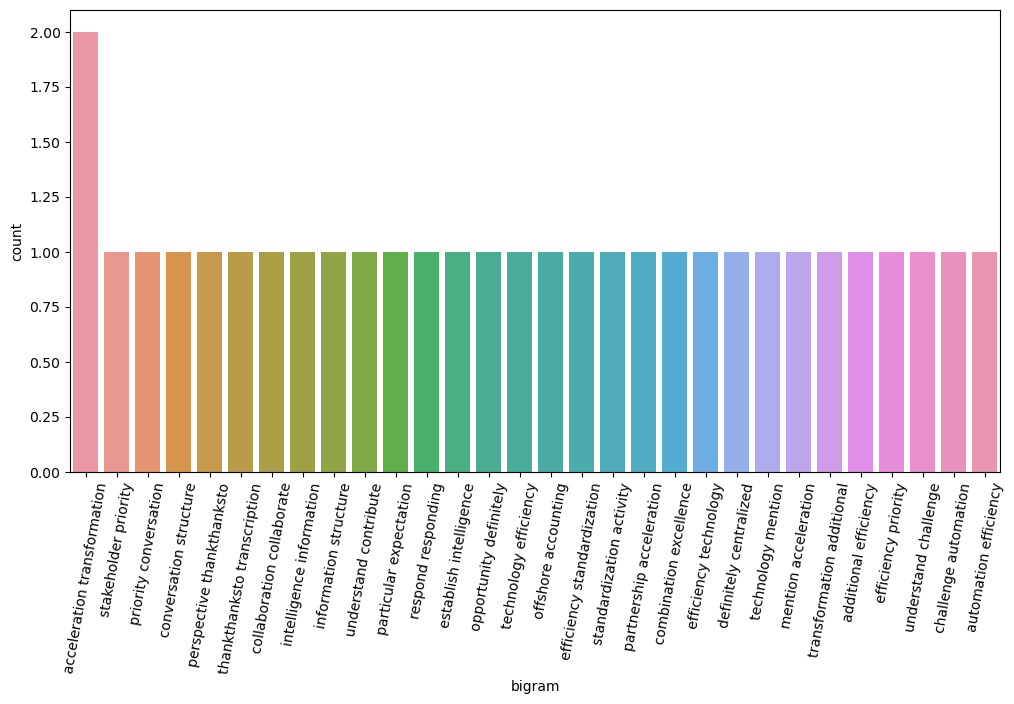

In [40]:
#Plot graph for the top 30 words in the bigram frequency
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

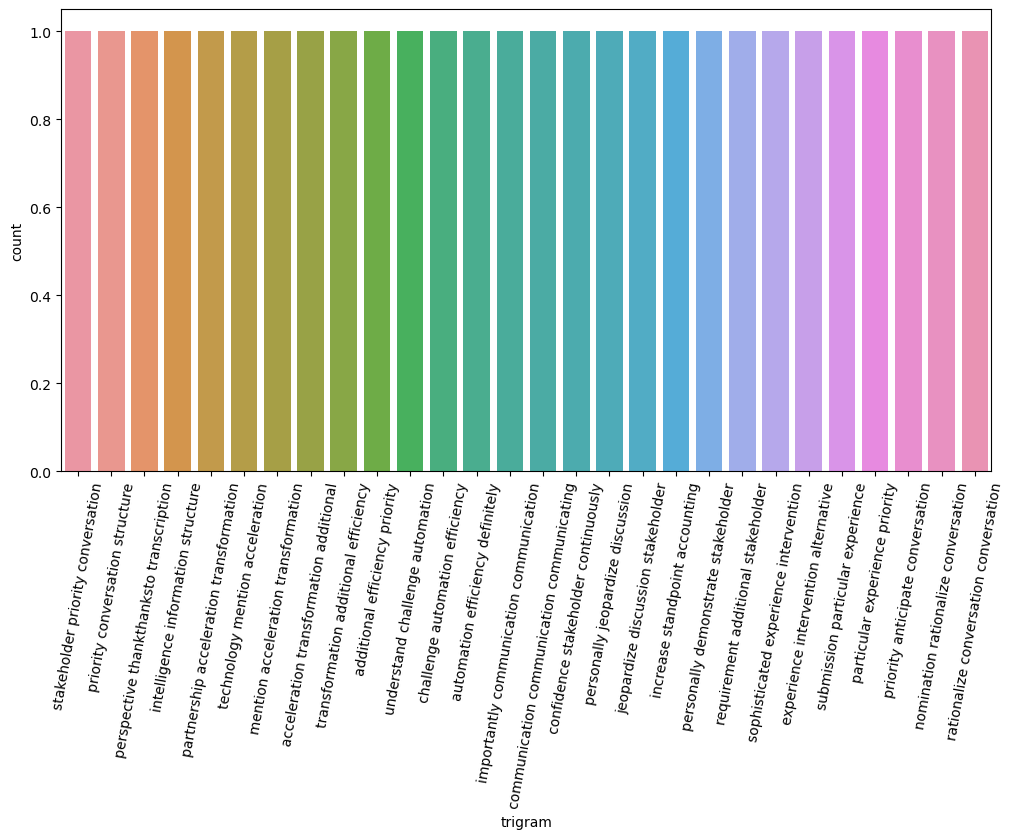

In [41]:
#Plot graph for the top 30 words in the trigram frequency
df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()

## TF IDF Vectorizer ##

In [42]:
'''
Convert the raw texts to a matrix of TF-IDF features

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

min_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"
'''

'\nConvert the raw texts to a matrix of TF-IDF features\n\nmax_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"\n\nmin_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"\n'

In [43]:
cleandat

,Text,cleanedText,lemma
0,Clarifying questions.,clarifying,clarify
6,Thank you Sunderland. Thanks Sobis Chanakyan c...,sunderland,sunderland
7,Kind of a format will be run twice a year with...,stakeholder priority conversation structured,stakeholder priority conversation structure
8,"How you see it playing out today, there are th...",participating,participate
13,"And feel free to answer, as Sundar mentioned, ...",perspective thankthanksto transcription possib...,perspective thankthanksto transcription
18,"Yeah, no, no. So basically, if you want to go ...",particularly,particularly
19,We do work as one team. There is a lot of coll...,collaboration collaborate,collaboration collaborate
20,"Ohh, you know solutioning mindset that we go w...",solutioning,solutioning
29,Intelligence and information all under one roo...,intelligence information structured,intelligence information structure
32,I I would recall what Subish and Sanal my coll...,colleague,colleague


In [44]:
## Topic Modelling lDA and NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#no_features = 100

In [45]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=1, max_df=0.95,max_features=None,stop_words='english',encoding='utf-8')

In [46]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(cleandat.cleanedText)

In [47]:
tfidf.get_feature_names()

['absolutely',
 'acceleration',
 'accounting',
 'activity',
 'additional',
 'alternative',
 'anticipate',
 'appropriate',
 'articulate',
 'automation',
 'availability',
 'centralized',
 'challenge',
 'clarifying',
 'collaborate',
 'collaboration',
 'colleague',
 'combination',
 'communicating',
 'communication',
 'competency',
 'confidence',
 'connecting',
 'continuously',
 'contribute',
 'conversation',
 'corresponds',
 'definitely',
 'demonstrate',
 'demonstrating',
 'dependency',
 'difference',
 'discussion',
 'diversification',
 'downloaded',
 'ecosystem',
 'efficiency',
 'essentially',
 'establishing',
 'excellence',
 'expectation',
 'experience',
 'immediately',
 'importantly',
 'improvement',
 'increasing',
 'information',
 'intelligence',
 'interaction',
 'intervention',
 'jeopardizes',
 'journalistic',
 'keepactually',
 'mentioning',
 'nomination',
 'offshoring',
 'operation',
 'opportunity',
 'organization',
 'participate',
 'participating',
 'particular',
 'particularly',
 '

In [48]:
len(tfidf.get_feature_names())

94

In [49]:
'''
Topic Modelling using NMF
Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

Find the best number of clusters
Apply the best number to create word clusters
Inspect & validate the correction of each cluster wrt the complaints
Correct the labels if needed
Map the clusters to topics/cluster names
'''

'\nTopic Modelling using NMF\nNon-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.\n\nIn this task you have to perform the following:\n\nFind the best number of clusters\nApply the best number to create word clusters\nInspect & validate the correction of each cluster wrt the complaints\nCorrect the labels if needed\nMap the clusters to topics/cluster names\n'

In [50]:
from sklearn.decomposition import NMF

In [51]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [52]:
#Print the Top15 words for each of the topics
num_words=15

vocab = np.array(tfidf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [53]:
vocab

array(['absolutely', 'acceleration', 'accounting', 'activity',
       'additional', 'alternative', 'anticipate', 'appropriate',
       'articulate', 'automation', 'availability', 'centralized',
       'challenge', 'clarifying', 'collaborate', 'collaboration',
       'colleague', 'combination', 'communicating', 'communication',
       'competency', 'confidence', 'connecting', 'continuously',
       'contribute', 'conversation', 'corresponds', 'definitely',
       'demonstrate', 'demonstrating', 'dependency', 'difference',
       'discussion', 'diversification', 'downloaded', 'ecosystem',
       'efficiency', 'essentially', 'establishing', 'excellence',
       'expectation', 'experience', 'immediately', 'importantly',
       'improvement', 'increasing', 'information', 'intelligence',
       'interaction', 'intervention', 'jeopardizes', 'journalistic',
       'keepactually', 'mentioning', 'nomination', 'offshoring',
       'operation', 'opportunity', 'organization', 'participate',
       

In [54]:
topics

['stakeholder operation personally demonstrate requirement continuously confidence additional jeopardizes discussion structured priority experience centralized corresponds',
 'perspective reflection efficiency transcription possibility thankthanksto standpoint accounting journalistic increasing offshoring ecosystem dependency downloaded sunderland',
 'experience articulate particular submission intervention sophisticated alternative priority expectation stakeholder sponsorship interaction appropriate diversification corresponds',
 'technology efficiency definitely standardization mentioning acceleration transformation additional challenge understand automation priority activity opportunity centralized',
 'conversation priority anticipate structured contribute nomination rationalize particular submission communication intelligence information mentioning transformation acceleration']

In [55]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

colnames = ["Topic" + str(i) for i in range(nmf_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(cleandat.lemma))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.00,0.0,0.0,0.0,0.00,0
Doc1,0.00,0.0,0.0,0.0,0.00,0
Doc2,0.21,0.0,0.0,0.0,0.73,4
Doc3,0.00,0.0,0.0,0.0,0.00,0
Doc4,0.00,0.3,0.0,0.0,0.00,1


In [56]:
#Assign the best topic to each of the cmplaints in Topic Column
cleandat['Topic'] = significant_topic

In [57]:
cleandat

,Text,cleanedText,lemma,Topic
0,Clarifying questions.,clarifying,clarify,0
6,Thank you Sunderland. Thanks Sobis Chanakyan c...,sunderland,sunderland,0
7,Kind of a format will be run twice a year with...,stakeholder priority conversation structured,stakeholder priority conversation structure,4
8,"How you see it playing out today, there are th...",participating,participate,0
13,"And feel free to answer, as Sundar mentioned, ...",perspective thankthanksto transcription possib...,perspective thankthanksto transcription,1
18,"Yeah, no, no. So basically, if you want to go ...",particularly,particularly,0
19,We do work as one team. There is a lot of coll...,collaboration collaborate,collaboration collaborate,0
20,"Ohh, you know solutioning mindset that we go w...",solutioning,solutioning,0
29,Intelligence and information all under one roo...,intelligence information structured,intelligence information structure,4
32,I I would recall what Subish and Sanal my coll...,colleague,colleague,0


In [58]:
cleandat['Topic'].unique()

array([0, 4, 1, 3, 2], dtype=int64)

## Topic Wise Distribution ##

In [59]:
cleandat[['Text','cleanedText','lemma','Topic']][cleandat.Topic==0].head(30)

,Text,cleanedText,lemma,Topic
0,Clarifying questions.,clarifying,clarify,0
6,Thank you Sunderland. Thanks Sobis Chanakyan c...,sunderland,sunderland,0
8,"How you see it playing out today, there are th...",participating,participate,0
18,"Yeah, no, no. So basically, if you want to go ...",particularly,particularly,0
19,We do work as one team. There is a lot of coll...,collaboration collaborate,collaboration collaborate,0
20,"Ohh, you know solutioning mindset that we go w...",solutioning,solutioning,0
32,I I would recall what Subish and Sanal my coll...,colleague,colleague,0
45,"Uh, you know, to put it in different words, es...",essentially,essentially,0
48,The the and also I think the fact that we esta...,responding responding,respond responding,0
52,What we're trying to say is that while we have...,specifically,specifically,0


In [60]:
cleandat[['Text','cleanedText','lemma','Topic']][cleandat.Topic==1].head(30)

,Text,cleanedText,lemma,Topic
13,"And feel free to answer, as Sundar mentioned, ...",perspective thankthanksto transcription possib...,perspective thankthanksto transcription,1
39,OK. Thanks for that perspective.,perspective,perspective,1
84,"Yeah, I think I think from my perspective.",perspective,perspective,1
100,Yeah. Yeah. Thanks for that perspective.,perspective,perspective,1
108,"It should not be at the cost of, you know, bri...",perspective efficiency,perspective efficiency,1
131,Right. And from the location spread perspectiv...,perspective,perspective,1
206,"Right, that that's so helpful perspective. Tha...",perspective reflection,perspective reflection,1


In [61]:
cleandat[['Text','cleanedText','lemma','Topic']][cleandat.Topic==2].head(10)

,Text,cleanedText,lemma,Topic
76,So I think that is 1 plus point that I could I...,experience,experience,2
178,What we could do better from her stakeholder e...,stakeholder experience,stakeholder experience,2
202,"From from an experience point of view, right, ...",experience,experience,2
221,Can it be a seamless experience though? Subish...,experience,experience,2
244,So it was to be a more sophisticated experienc...,sophisticated experience intervention alternative,sophisticated experience intervention alternative,2
248,OK. No. So thanks for your submissions. We do ...,submission particular experience priority,submission particular experience priority,2
279,"And then if you're getting similar answers, sa...",articulate experience,articulate experience,2


In [62]:
cleandat[['Text','cleanedText','lemma','Topic']][cleandat.Topic==3].head(10)

,Text,cleanedText,lemma,Topic
60,To the opportunities and not not on the streng...,opportunity definitely,opportunity definitely,3
65,Right. Thanks for sharing Pramod and to your p...,mentioning,mention,3
67,"With respect to your business, what has been t...",technology efficiency,technology efficiency,3
71,To see how well some of these technologies tha...,technology,technology,3
72,"To infuse in more efficiency into the system, ...",efficiency standardization,efficiency standardization,3
74,Standardization was one of the biggest goals t...,standardization activity,standardization activity,3
77,Right. So it's a partnership or the vendor eco...,partnership acceleration transformation,partnership acceleration transformation,3
90,So that's an added advantage. It's helping the...,efficiency technology,efficiency technology,3
91,Ideally been the processes all of that I think...,definitely centralized,definitely centralized,3
103,So what impact has GDS made on your business? ...,technology mentioning acceleration transformat...,technology mention acceleration transformation...,3


In [63]:
cleandat[['Text','cleanedText','lemma','Topic']][cleandat.Topic==4].head(10)

,Text,cleanedText,lemma,Topic
7,Kind of a format will be run twice a year with...,stakeholder priority conversation structured,stakeholder priority conversation structure,4
29,Intelligence and information all under one roo...,intelligence information structured,intelligence information structure,4
36,How are you enabling the business aspect of it...,understand contribute,understand contribute,4
37,Right. And it's cool leading question there. C...,particular expectation,particular expectation,4
41,"Uh, promote. I see you just joined us. We had ...",conversation,conversation,4
49,And there is a demand for a particular type of...,particular,particular,4
50,Establishing new services is pretty quick in G...,establishing intelligence,establish intelligence,4
110,Said you'll aside. Or would that have been a b...,communication,communication,4
111,I think it would be a mix of both. One is if y...,importantly communication communication commun...,importantly communication communication commun...,4
167,Lack of communication or.,communication,communication,4


## Coherence Score ##

In [64]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [65]:
import nltk
allWords = nltk.tokenize.word_tokenize(textstr)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

#stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stpwrd) 

In [66]:
allWordExceptStopDist

FreqDist({'stakeholder': 15, 'perspective': 7, 'experience': 7, 'efficiency': 6, 'priority': 5, 'conversation': 5, 'definitely': 5, 'technology': 4, 'communication': 4, 'particular': 3, ...})

In [67]:
## Contraction map ##

In [68]:
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

In [69]:
# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    #text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text


def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

## Processing the Text ##

In [70]:
cleandat['cleanedText_processed'] = cleandat['cleanedText'].apply(process_text)
cleandat.head()

,Text,cleanedText,lemma,Topic,cleanedText_processed
0,Clarifying questions.,clarifying,clarify,0,[clarifying]
6,Thank you Sunderland. Thanks Sobis Chanakyan c...,sunderland,sunderland,0,[sunderland]
7,Kind of a format will be run twice a year with...,stakeholder priority conversation structured,stakeholder priority conversation structure,4,"[stakeholder, priority, conversation, structured]"
8,"How you see it playing out today, there are th...",participating,participate,0,[participating]
13,"And feel free to answer, as Sundar mentioned, ...",perspective thankthanksto transcription possib...,perspective thankthanksto transcription,1,"[perspective, thankthanksto, transcription, po..."


In [71]:
## Getting the top 20 most common words among all articles ##
p_text = cleandat['cleanedText_processed']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,stakeholder,15
1,perspective,7
2,experience,7
3,efficiency,6
4,priority,5
5,conversation,5
6,definitely,5
7,technology,4
8,communication,4
9,particular,3


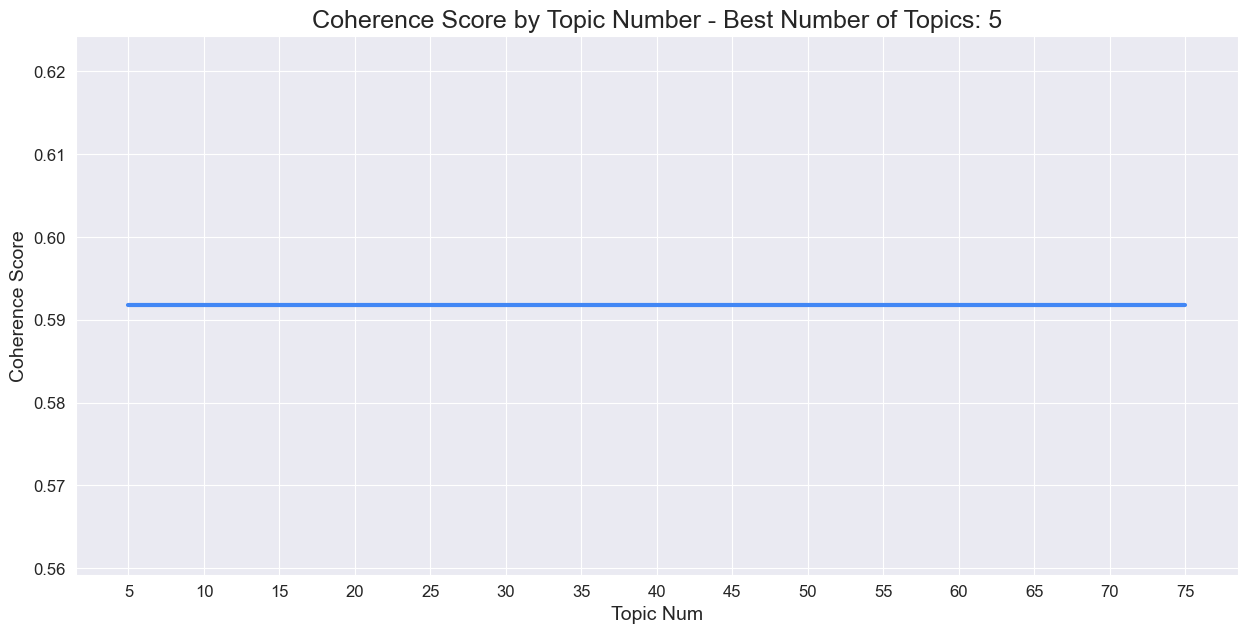

In [72]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = cleandat['cleanedText_processed']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

file_name = 'c_score'



plt.show()

In [79]:
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model

texts = cleandat['cleanedText_processed']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=2,
    max_df=0.95,
    max_features=5000,
    ngram_range=(1,2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [80]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 15

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,topics
0,stakeholder,personally,additional,structured,conversation,priority,intelligence,specifically,efficiency,acceleration transformation,accounting,activity,challenge,communication,contribute,stakeholder personally additional structured c...
1,perspective,efficiency,standpoint,accounting,specifically,understood,experience,acceleration transformation,activity,additional,challenge,communication,contribute,conversation,definitely,perspective efficiency standpoint accounting s...
2,experience,particular,priority,contribute,stakeholder,standpoint,accounting,understood,acceleration transformation,activity,additional,challenge,communication,conversation,definitely,experience particular priority contribute stak...
3,definitely,challenge,understand,efficiency,contribute,understood,acceleration transformation,accounting,activity,additional,communication,conversation,experience,immediately,intelligence,definitely challenge understand efficiency con...
4,technology,efficiency,conversation,priority,standardization,mentioning,acceleration,transformation,acceleration transformation,additional,structured,contribute,understand,particular,challenge,technology efficiency conversation priority st...


In [81]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df

,topic_num,topics
0,0,stakeholder personally additional structured c...
1,1,perspective efficiency standpoint accounting s...
2,2,experience particular priority contribute stak...
3,3,definitely challenge understand efficiency con...
4,4,technology efficiency conversation priority st...


## NMF Further improvization ##

In [82]:
from nltk.corpus import stopwords;
import nltk;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;

vectorizer = CountVectorizer(analyzer='word', max_features=5000, stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}');
x_counts = vectorizer.fit_transform(cleandat.cleanedText);
print( "Created %d X %d document-term matrix" % (x_counts.shape[0], x_counts.shape[1]) )
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

Created 94 X 94 document-term matrix


In [83]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)
model = NMF(n_components=5, init='nndsvd');
model.fit(xtfidf_norm)

NMF(init='nndsvd', n_components=5)

In [84]:
def get_nmf_topics(model, n_top_words):
    
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [85]:
num_topics = 5
nmf_df = get_nmf_topics(model, 5)
nmf_df

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,stakeholder,perspective,experience,communication,understood
1,operation,efficiency,articulate,communicating,immediately
2,personally,reflection,particular,importantly,technology
3,demonstrate,technology,submission,immediately,efficiency
4,requirement,possibility,priority,technology,definitely
5,continuously,transcription,intervention,efficiency,standardization
6,confidence,thankthanksto,alternative,standardization,activity
7,additional,standardization,sophisticated,definitely,mentioning
8,conversation,challenge,expectation,activity,challenge
9,structured,definitely,contribute,mentioning,conversation


## Topic wise word list contribution ##

In [86]:
raw_documents = cleandat['Text'].str.strip()
raw_documents = raw_documents.str.lower()
raw_documents = raw_documents.tolist()

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
# use a custom stopwords list, set the minimum term-document frequency to 20
vectorizer = CountVectorizer(stop_words = stop_words) #custom_stop_words
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Created 94 X 540 document-term matrix


In [88]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 540 distinct terms


In [89]:
import operator
def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [90]:
ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )


01. know (46.00)
02. think (42.00)
03. gds (31.00)
04. right (31.00)
05. questions (16.00)
06. service (14.00)
07. stakeholders (12.00)
08. just (11.00)
09. services (11.00)
10. teams (11.00)
11. business (10.00)
12. yeah (9.00)
13. better (8.00)
14. bring (8.00)
15. people (8.00)
16. today (8.00)
17. work (8.00)
18. basically (7.00)
19. come (7.00)
20. experience (7.00)


In [91]:
k = 10
# create the model
from sklearn import decomposition
model = decomposition.NMF( n_components=k ) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

In [92]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [93]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: know, country, different, local, standpoint, think, tax, specific, growth, rules
Topic 02: think, yeah, communication, right, regions, want, ok, don, business, gds
Topic 03: questions, priorities, conversation, minutes, 45, entire, looking, number, session, stakeholders
Topic 04: right, terms, just, answer, services, comes, efficiency, perspective, scale, point
Topic 05: service, functions, roof, cross, quite, today, group, lines, just, gds
Topic 06: gds, bring, cost, efficiencies, value, bringing, look, challenges, business, continue
Topic 07: work, teams, today, matter, lot, talk, know, services, chanakya, collaborate
Topic 08: basically, utilizing, external, know, member, firms, india, gds, savings, ecosystem
Topic 09: come, people, know, seen, right, ve, best, practices, don, multiple
Topic 10: teams, multiple, doing, gds, service, know, right, thought, good, need


In [94]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [95]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

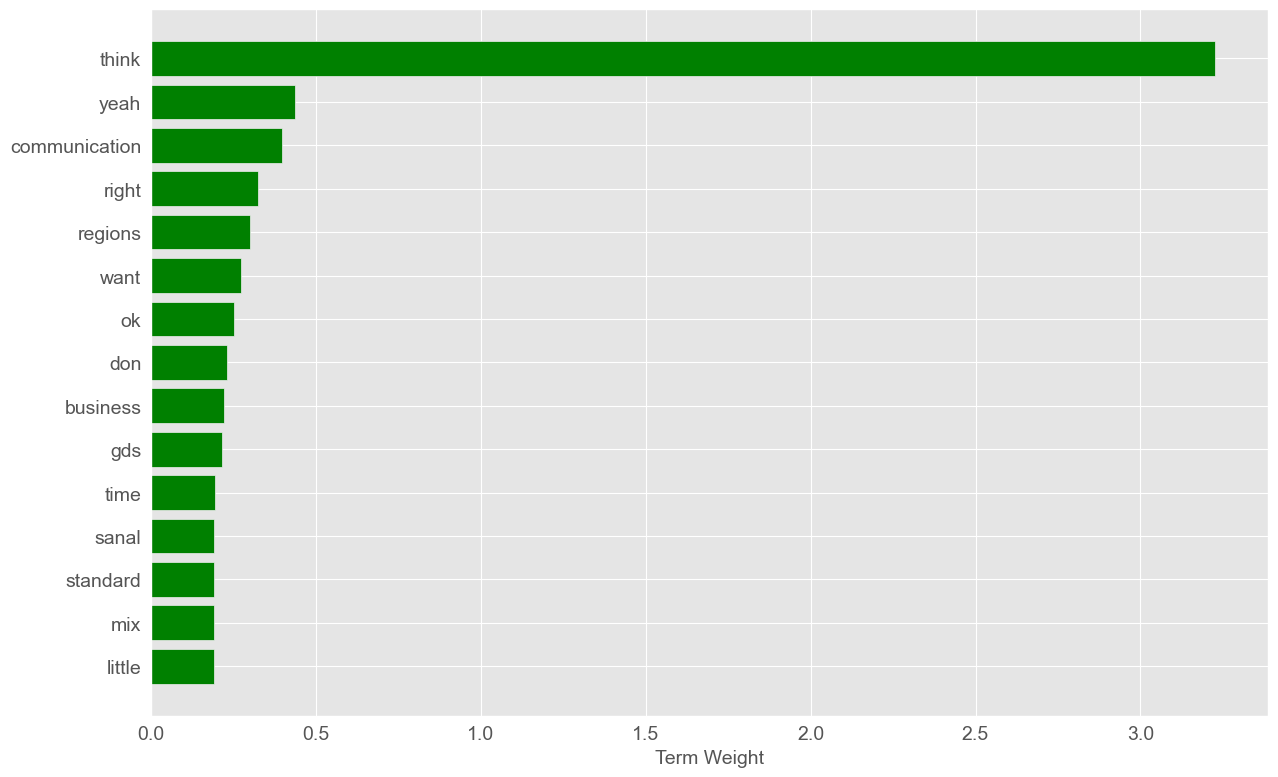

In [96]:
plot_top_term_weights( terms, H, 1, 15 )

## Creating the Topic Models ##

## 
A common approach for parameter selection is to Measure and compare the topic coherence of models generated for different values of k.
We need to start by pre-specifying an initial range of "sensible" values
##

In [97]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

In [98]:
kmin, kmax = 2, 8

## Apply NMF ##

In [99]:
from sklearn import decomposition
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )


Applying NMF for k=2 ...
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...


## we need to define a class that will generate documents in a form that can be consumed by Gensim's Word2Vec implementation ##

In [100]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [101]:
import gensim
docgen = TokenGenerator(raw_documents, stop_words )
w2v_model = gensim.models.Word2Vec(docgen,min_count=20, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...



## Selecting the Number of Topics
Once we have our Word2vec model, we can use it as part of our topic coherence approach to evaluate the different NMF topic models that we created previously. To do this, we will implement a simple version of the TC-W2V coherence measure.
We use the Word2vec model to calculate coherence scores for each of these models. We will define this coherence score as follows

In [102]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

## We also define a function to get the topic descriptor (i.e. list of top terms) for each topic¶
##

In [103]:
import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [104]:
from itertools import combinations
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index,10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append(calculate_coherence(w2v_model,term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

KeyError: "Key 'country' not present"

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [ ]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [ ]:
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [ ]:
for topic_index in range(k):
    descriptor = get_descriptor( terms, H, topic_index, 10 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

In [ ]:
#init="nndsvd",

In [103]:
kmin, kmax = 2, 30

topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok.lower() in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok.lower() )
            yield tokens

docgen = TokenGenerator(raw_documents, stop_words)
w2v_model = gensim.models.Word2Vec(docgen, min_count=20, sg=1)

def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            #print(str(pair[0]) + " " + str(pair[1]))
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

%matplotlib inline
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

Applying NMF for k=2 ...
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...
Applying NMF for k=21 ...
Applying NMF for k=22 ...
Applying NMF for k=23 ...
Applying NMF for k=24 ...
Applying NMF for k=25 ...
Applying NMF for k=26 ...
Applying NMF for k=27 ...
Applying NMF for k=28 ...
Applying NMF for k=29 ...
Applying NMF for k=30 ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


KeyError: "Key 'country' not present"